**Nitheeswaran M 24BAD079**

**Scenario 1**

In [46]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [47]:
df = pd.read_csv('/kaggle/input/datasets/yasserh/breast-cancer-dataset/breast-cancer.csv')

In [48]:
print("Data Inspection")
print(df.head())
print(df.info())

Data Inspection
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter

In [49]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
X = df[features]

In [50]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

In [53]:
best_k = k_values[np.argmax(accuracies)]
print(f"\nOptimal value for K: {best_k}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_pred = final_knn.predict(X_test_scaled)


Optimal value for K: 2


In [54]:
print("\nModel Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))

misclassified_idx = np.where(y_test != y_pred)[0]
print(f"\nNumber of misclassified cases: {len(misclassified_idx)}")
print("Indices of misclassified cases in the test set:", misclassified_idx)


Model Evaluation
Accuracy: 0.9211

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.91      0.97      0.94        72
Malignant (1)       0.95      0.83      0.89        42

     accuracy                           0.92       114
    macro avg       0.93      0.90      0.91       114
 weighted avg       0.92      0.92      0.92       114


Number of misclassified cases: 9
Indices of misclassified cases in the test set: [ 16  24  38  42  45  69  92 107 112]


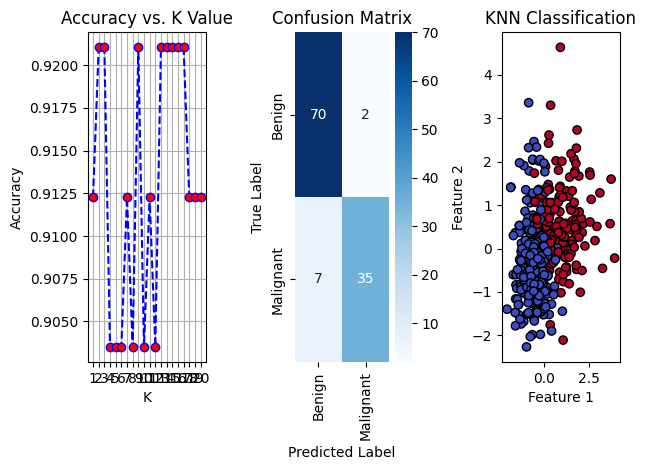

In [55]:
plt.subplot(1, 3, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='blue', markerfacecolor='red')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
X_2d = X_train_scaled[:, :2]
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_2d, y_train)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

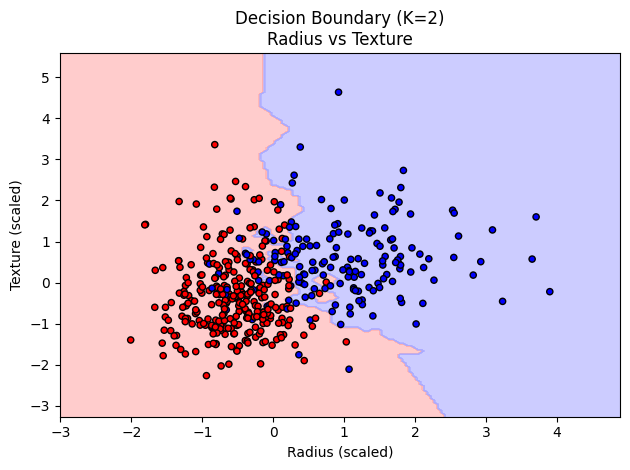

Nitheeswaran M 24BAD079


In [56]:
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.title(f'Decision Boundary (K={best_k})\nRadius vs Texture')
plt.xlabel('Radius (scaled)')
plt.ylabel('Texture (scaled)')
plt.tight_layout()
plt.show()

print("Nitheeswaran M 24BAD079")

**Scenario 2**

In [57]:
df = pd.read_csv('/kaggle/input/datasets/ninzaami/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

In [58]:
features = ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Education', 'Property_Area']
target = 'Loan_Status'

df = df[features + [target]].copy()

In [59]:
print("Data Imputation ")

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Property_Area'] = df['Property_Area'].fillna(df['Property_Area'].mode()[0])

Data Imputation 


In [60]:
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Property_Area'] = encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = encoder.fit_transform(df['Loan_Status']) 

In [61]:
X = df[features]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train, y_train)

print("Deep Tree Performance")
train_acc_deep = accuracy_score(y_train, deep_tree.predict(X_train))
test_acc_deep = accuracy_score(y_test, deep_tree.predict(X_test))
print(f"Training Accuracy: {train_acc_deep:.4f}")
print(f"Testing Accuracy:  {test_acc_deep:.4f}")

Deep Tree Performance
Training Accuracy: 1.0000
Testing Accuracy:  0.6504


In [63]:
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

print("Shallow Tree Performance")
train_acc_shallow = accuracy_score(y_train, shallow_tree.predict(X_train))
test_acc_shallow = accuracy_score(y_test, shallow_tree.predict(X_test))
print(f"Training Accuracy: {train_acc_shallow:.4f}")
print(f"Testing Accuracy:  {test_acc_shallow:.4f}")

Shallow Tree Performance
Training Accuracy: 0.8004
Testing Accuracy:  0.8455


In [64]:
y_pred = shallow_tree.predict(X_test)
print("Model Evaluation ")
print("Classification Report :")
print(classification_report(y_test, y_pred, target_names=['Rejected (0)', 'Approved (1)']))

Model Evaluation 
Classification Report :
              precision    recall  f1-score   support

Rejected (0)       0.95      0.53      0.68        38
Approved (1)       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [65]:
importances = shallow_tree.feature_importances_
print("Feature Importance :")
for feature, imp in zip(features, importances):
    print(f"{feature}: {imp:.4f}")

Feature Importance :
ApplicantIncome: 0.0295
LoanAmount: 0.1118
Credit_History: 0.8587
Education: 0.0000
Property_Area: 0.0000


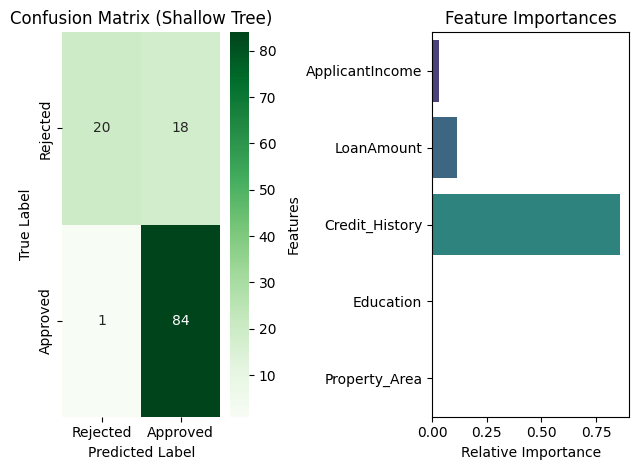

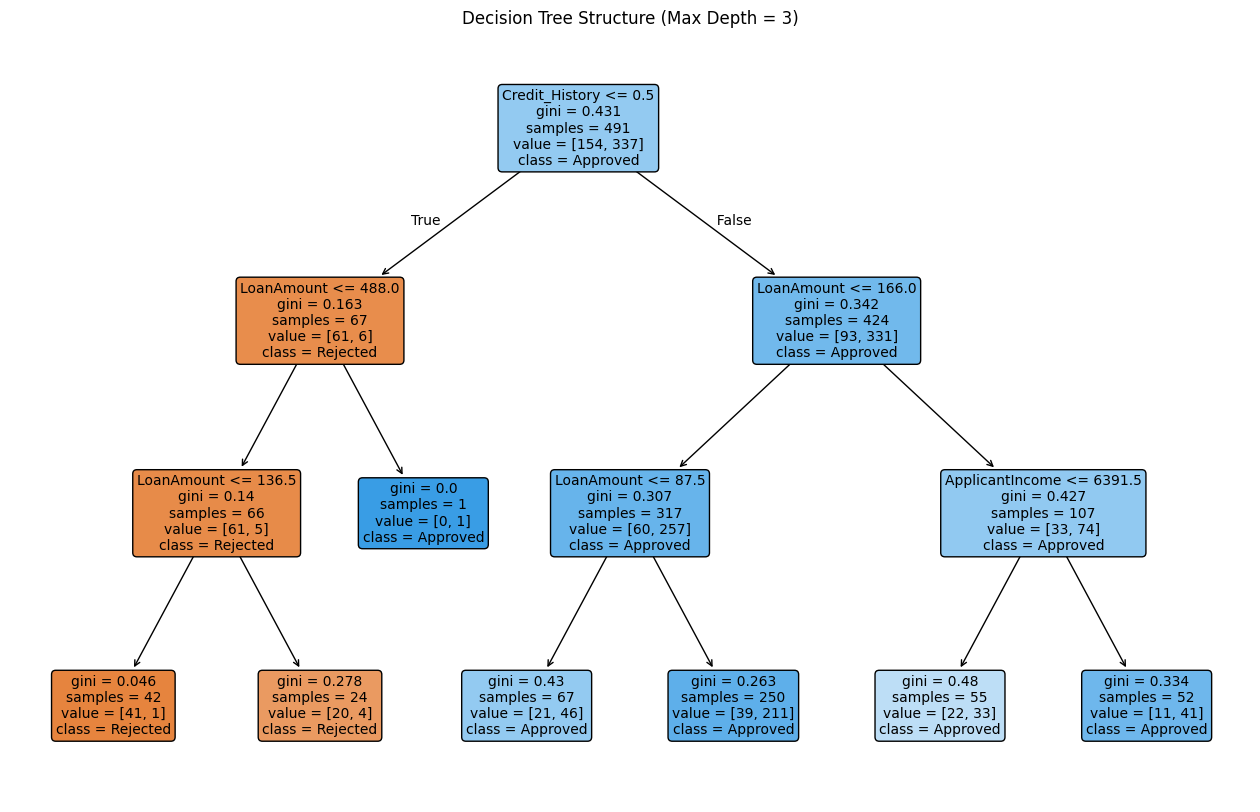

Nitheeswaran M 24BAD079


In [66]:
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix (Shallow Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.barplot(x=importances, y=features, hue=features, palette='viridis', legend=False)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
plot_tree(shallow_tree, 
          feature_names=features, 
          class_names=['Rejected', 'Approved'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Structure (Max Depth = 3)")
plt.show()

print("Nitheeswaran M 24BAD079")